In [1]:
import pandas as pd
import os
import numpy as np
import torch
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util

c:\Users\user\miniconda3\envs\py\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### filt out len(Toldescribe) > 512

In [62]:
df = pd.read_csv(os.path.join("raw","Scenic_Spot_C_f.csv"))
df.head()

,Id,Name,Zone,Toldescribe,Description,Tel,Add,Zipcode,Region,Town,...,Class3,Level,Website,Parkinginfo,Parkinginfo_Px,Parkinginfo_Py,Ticketinfo,Remarks,Keyword,Changetime
0,C1_313020000G_000026,宏亞食品巧克力觀光工廠,NaN,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...,巧克力共和國是一座以巧克力為主題的觀光工廠，建築設計、館內主題設計皆以巧克力為主題，這裡也提...,886-3-3656555,桃園縣八德市建國路386號,33451.0,桃園市,八德區,...,NaN,9.0,NaN,NaN,121.297187,24.943325,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,桃園，宏亞，巧克力，觀光工廠,2013/07/13 15:00:00
1,C1_313020000G_000105,台灣金屬創意館,NaN,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,886-6-2036735#245,台南市永康區永科環路598號,71041.0,臺南市,永康區,...,NaN,9.0,NaN,NaN,120.275724,23.045063,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,台南，志鋼，金屬，觀光工廠,2013/07/13 15:00:00
2,C1_313020000G_000136,臺灣菸酒(股)公司林口觀光酒廠,NaN,林口酒廠為擁有近百年歷史的台北酒廠(1921)、板橋酒廠(1937)、樹林酒廠(1906)合...,林口酒廠為北部地區產能最大、設備最現代化的清酒、紅麴葡萄酒生產工廠。廠內有產品推廣中心，開放...,886-3-3283001#430,桃園縣龜山鄉文化一路55號,333.0,桃園市,龜山區,...,NaN,9.0,http://event.ttl-eshop.com.tw/lk/,NaN,121.375231,25.056168,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,林口，菸酒，酒廠，觀光工廠,2013/07/13 15:00:00
3,C1_315080500H_000007,水璉、牛山海岸,NaN,水璉位在花蓮縣壽豐鄉海濱，蒼翠的山丘環抱著寬廣的河谷盆地，水璉溪蜿蜒而過，沿著公路邊的小徑往...,"水璉位在花蓮縣壽豐鄉海濱，為阿美族世居之地，早在3,500年前即有繩紋陶文化之先民居住於此。...",886-3-8601400,花蓮縣974壽豐鄉牛山39之5號,974.0,花蓮縣,壽豐鄉,...,NaN,NaN,NaN,NaN,NaN,NaN,牛山呼庭園區需付50元門票，可抵用飲品。,東海岸的石頭雖美，但請切勿撿取。走米棧古道，記得帶瓶水解渴。,NaN,2021/11/04 11:31:29
4,C1_315080500H_000012,石梯坪,NaN,石梯坪擁有經風力和海水雕刻而成的特殊岩岸風景，潮間帶上豐富的自然生態資源：螃蟹、海星、海參、...,石梯坪位在花蓮縣豐濱鄉石梯灣的南側，整個區域是一個面積極大的海岸階地，海蝕地形十分發達，海蝕...,886-3-8781452,花蓮縣977豐濱鄉石梯坪52號,977.0,花蓮縣,豐濱鄉,...,NaN,NaN,NaN,NaN,NaN,NaN,大型車：假日200元、非假日170元小型車：假日60元、非假日50元機車：假日20元、非假日15元,1.石梯坪沒有遮陽設施，海邊日照強，要做好防曬；裝備也要齊全，除了遮陽的帽子、長褲、長袖，解...,NaN,2022/07/08 13:41:26


In [63]:
df.shape

(5684, 35)

In [64]:
desc = df[['Name','Toldescribe']]
desc.head()

,Name,Toldescribe
0,宏亞食品巧克力觀光工廠,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...
1,台灣金屬創意館,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...
2,臺灣菸酒(股)公司林口觀光酒廠,林口酒廠為擁有近百年歷史的台北酒廠(1921)、板橋酒廠(1937)、樹林酒廠(1906)合...
3,水璉、牛山海岸,水璉位在花蓮縣壽豐鄉海濱，蒼翠的山丘環抱著寬廣的河谷盆地，水璉溪蜿蜒而過，沿著公路邊的小徑往...
4,石梯坪,石梯坪擁有經風力和海水雕刻而成的特殊岩岸風景，潮間帶上豐富的自然生態資源：螃蟹、海星、海參、...


In [40]:
testtext = desc.iloc[0]['Toldescribe']
print(testtext)

宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及相關造型皆與巧克力密不可分，全棟為綠建築，展場設計依照建築外觀之透光與否進行規劃，節能省碳，此外，展場更提供豐富的巧克力相關知識(含巧克力3500年歷史)為一寓教於樂之專業型廠館，是休閒娛樂絕佳去處。


In [44]:
desc.iloc[[1,2,3]]

,Name,Toldescribe
1,台灣金屬創意館,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...
2,臺灣菸酒(股)公司林口觀光酒廠,林口酒廠為擁有近百年歷史的台北酒廠(1921)、板橋酒廠(1937)、樹林酒廠(1906)合...
3,水璉、牛山海岸,水璉位在花蓮縣壽豐鄉海濱，蒼翠的山丘環抱著寬廣的河谷盆地，水璉溪蜿蜒而過，沿著公路邊的小徑往...


In [65]:
legal_data = []
for idx in range(desc.shape[0]):
    l = len(desc.iloc[idx]['Toldescribe'])
    if '遊客中心' in desc.iloc[idx]['Name']:
        continue
    if l <= 512 and l > 10:
        legal_data.append(idx)
print(len(legal_data))

4674


In [66]:
legal_df = desc.iloc[legal_data]
legal_df.head()

,Name,Toldescribe
0,宏亞食品巧克力觀光工廠,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...
1,台灣金屬創意館,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...
5,長虹橋,長虹橋優雅的拱形橋身橫跨在秀姑巒溪出海口處兩岸，在山海交際之處形成一道美麗的虹影，成為東海岸...
6,北回歸線,台灣一共有三個北回歸線標，分別在嘉義水上鄉、花蓮舞鶴台地、豐濱鄉，而這座北回歸線標碑位於台1...
7,金樽,金樽可俯瞰海岸全景，包含金樽漁港、白沙灣海灘以及附近的山澗峽谷，讓秀麗的景色完全盡收眼底，而...


In [67]:
legal_df.to_csv(
    os.path.join("raw","legaldata.csv"), 
    index=False, encoding='utf-8'
)

### Model testing


In [2]:
nlpmodel = SentenceTransformer(
    'distiluse-base-multilingual-cased-v1',cache_folder=os.path.join("nlpmodel")
)
nlpmodel.max_seq_length = 512

In [16]:
st1 = "昨天是個雨天"
st2 = "晚上吃拉麵"
st1_encode = nlpmodel.encode(st1)
st2_encode =nlpmodel.encode(st2)

cos = util.cos_sim(st1_encode, st2_encode)
print(f"{cos.item()}")

0.25077706575393677


### Transform

In [4]:
legal_df = pd.read_csv(os.path.join("raw","legaldata.csv"),encoding='utf-8')
legal_df.head()

,Name,Toldescribe
0,宏亞食品巧克力觀光工廠,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...
1,台灣金屬創意館,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...
2,長虹橋,長虹橋優雅的拱形橋身橫跨在秀姑巒溪出海口處兩岸，在山海交際之處形成一道美麗的虹影，成為東海岸...
3,北回歸線,台灣一共有三個北回歸線標，分別在嘉義水上鄉、花蓮舞鶴台地、豐濱鄉，而這座北回歸線標碑位於台1...
4,金樽,金樽可俯瞰海岸全景，包含金樽漁港、白沙灣海灘以及附近的山澗峽谷，讓秀麗的景色完全盡收眼底，而...


In [5]:
nlpmodel = SentenceTransformer(
    'distiluse-base-multilingual-cased-v1',cache_folder=os.path.join("nlpmodel")
)
nlpmodel.max_seq_length = 512
print("Max Sequence Length:", nlpmodel.max_seq_length)

Max Sequence Length: 512


#### See model

In [38]:
def get_specific_attraction_ebd(name, print_desc=False):
    thisattraction = legal_df[legal_df['Name']==name]
    desc = thisattraction['Toldescribe'].tolist()[0]

    if not len(desc):
        print("No such a attraction")
        return None
    
    if len(desc) > 512:
        print("may fail")

    if print_desc:
        print(desc)
        print("="*60)


    return nlpmodel.encode(desc)
    

##### Ex 1

In [39]:
成功新港漁港 = get_specific_attraction_ebd(
    name="成功新港漁港", print_desc=True
)
玄光寺 = get_specific_attraction_ebd(
    name='玄光寺', print_desc=True
)
美人洞 = get_specific_attraction_ebd(
    name = '美人洞', print_desc=True
)

成功新港漁港是東海岸地區最大的漁港，漁港面臨太平洋，是黑潮暖流經過的海域，鬼頭刀、旗魚、鰹魚等豐富的海洋資源，造就了成功獨特的鏢旗魚技藝，以及漁業文化的蓬勃發展。當每年10月吹起東北季風時，正是旗魚的盛產季節，漁民鏢旗魚的獨到技藝，讓旗魚肉質保留了鮮Q的口感，深受各地老饕的喜愛，紛紛來成功飽啖美味的旗魚大餐！黑潮暖流經過的成功，也是賞鯨的好地方！搭乘賞鯨船乘風破浪，遙望美麗的東海岸島嶼之餘，還有機會欣賞到海豚成群在海中跳躍，那美麗的時刻總是令人難以忘懷。除了賞鯨、冬天大啖旗魚之外，成功鎮上還有各種特色小吃、伴手禮，多汁的鬼頭刀魚排、綿密的成功豆花、用當地食材製作的手工餅等等，都是來成功不可錯過的美食喔！
在中日戰爭期間，日本人在南京取走玄奘法師的頂骨舍利，戰後送給中華民國佛教協會部分頂骨舍利，1955年迎靈骨來台，1958年安奉於日月潭畔的玄光寺。玄光寺離潭只有十餘公尺，寺下設有碼頭，遊客可搭船至碼頭，再走台階上去參觀；寺內供奉玄奘大師的金身，上懸「民族宗師」匾額；雖然玄奘大師的頂骨舍利已移奉於玄奘寺，但因水路交通便利，玄光寺已是遊客到日月潭旅遊必訪景點。玄光寺的建築採唐式，因為當初規劃為臨時安奉玄奘法師頂骨舍利，所以沒有碧瓦朱柱映照，顯得樸實清雅，反令人發思古之幽情；且因臨潭而建，可以就近欣賞日月潭的涵碧秀水，猶如置身於美麗畫境中。寺前有一塊分別刻有「日月潭」及「玄光寺」的大石頭，是遊客留下「到此一遊」的熱門景點；尤其是假日，等著拍照的排隊人潮，經常在小小的廟埕繞了好幾圈，也形成了另一個有趣的畫面。
浪漫在海角 相約美人洞! 美人洞位於琉球嶼東北角，背山面海，奇石陳列，主要由珊瑚礁岩構成，沿途美景連連，步行其中，渾然天成的礁岩洞穴，讓人為之驚嘆，站在高點眺望大海，聆聽浪濤聲，波光粼粼，會讓您的心情豁然開朗。 春夏季節，葉蟬展翅在枝葉間喜悅的跳動，礁岩上可以發現忙碌的蟻蟲忘情覓食，寄居蟹、紫地蟹橫行其道，草叢間可見臭鼬、小黃腹鼠、玄鼠等動物活動頻繁，走著走著，如果您運氣好，可以發現三級保育動物「紅尾伯勞鳥」不期而遇喔！若是在下過雨的夜晚，前往探索，會發現螢火蟲成群閃爍，形如星辰，種種大自然的景色，在美人洞中等您來發現！


In [35]:
print(util.cos_sim(成功新港漁港, 美人洞).item())
print(util.cos_sim(成功新港漁港, 玄光寺).item())

0.507492184638977
0.3369138240814209


##### Ex 2

In [43]:
大武國家森林步道 = get_specific_attraction_ebd(
    name="大武國家森林步道", print_desc=True
)
卡地布文化園區 = get_specific_attraction_ebd(
    name = "卡地布文化園區", print_desc=True
)

綠島朝日溫泉 = get_specific_attraction_ebd(
    name = "綠島朝日溫泉", print_desc=True
)

全台最迷你步道大武國家森林步道位於台東大武鄉，為環狀步道，坡度起伏不大，海拔也不高，適合一家大小悠閒共遊，其中豐富多樣的原始自然生態，居國家公園之冠，也使其獲得「台灣後花園」的美稱。大武國家森林步道入口在林務局大武工作站旁，沿著木階梯往上，便會看見步道起點，在綠意包圍下漫步，傾聽蟲鳴鳥叫，伴隨海浪拍打在沙灘上的聲音，視線所及是茂綠樹林、是高低不一的鄉村小屋，更是日常無法觸及的自然美好。森林步道沿途設有講解牌，詳細說明植物種類及地形介紹，步道也設有景觀亭供民眾休憩賞景、愜意野餐。登高望遠，可以眺望無邊壯闊的太平洋，遼闊美景讓心也跟著開闊；也可以看見鄰近的著名景點「大武彩虹村」，若有多餘時間，可以前往拍照打卡，為旅程留下美麗紀念。大武國家森林步道是全台最迷你步道，走進山林，探索珍貴生態圈，也親近海洋與藍天。想吸收芬多精，不必害怕體力無法負擔，大武國家森林步道舒適好走，邊散步邊享受大自然的美好，漫步森林步道，樂遊山海之間，給自己一趟療癒之旅！
離知本火車站不遠的地方，卡地布部落傳統文化園區就坐落在附近。園區內設置有瞭望台、巴拉冠(卡地布青年會所)、三大氏族祖靈屋(Mavaliw瑪法琉、Pakaruku巴卡魯固、Ruvaniaw羅法尼耀)、達古範(青少年聚會所)等傳統建築，由於這些傳統建築仍是卑南族居民集會活動的重要場所，因此遊客是不能進入的；另有多功能活動中心，展示原住民文物與歷史介紹。可事先於「知本卡地布部落」FB粉絲專頁預約導覽與DIY手作體驗，導覽人員會帶領大家深入認識卑南族的歷史人文，走訪融入原住民生活的不同宗教聖地；欣賞當地居民創作的傳統工藝，甚至可讓遊客選購當伴手禮，深具獨特風格。也可品嚐當地的釋迦，或是前往當地的餐飲店，豐富新鮮自然的原住民佳餚，美味的料理配上熱鬧的原住民音樂和舞蹈，都令人口齒留香、難以忘懷。小提醒：卡地布文化園區為開放式空間，皆開放參觀，但活動中心及小教室僅開放週一到週五09:00 &ndash; 12:30、13:30 &ndash; 17:30（週六、日不開放）其餘建築須遵守原住民禮儀規範，若不開放遊客、女性、小孩入內，請不要進入唷！
朝日溫泉位於東南方海岸帆船鼻一代，面向太平洋，因朝日出方向而命名為朝日溫泉，日治時期則稱為「旭溫泉」，是世界級的海底溫泉之一。朝日溫泉帶有海水的鹹味，屬於硫磺泉，對人類皮膚無刺激性，洗後也不黏澀。溫泉區設

In [44]:
print(util.cos_sim(大武國家森林步道, 卡地布文化園區).item())
print(util.cos_sim(大武國家森林步道, 綠島朝日溫泉).item())

0.4463205933570862
0.5018525123596191


#### Embedding all data

In [70]:
textemd = []
for i in tqdm(range(legal_df.shape[0])):
    text = legal_df.iloc[i]['Toldescribe']
    textemd.append(nlpmodel.encode(text))

100%|██████████| 4674/4674 [00:41<00:00, 111.68it/s]


In [71]:
features = np.array(textemd)

In [79]:
features = torch.tensor(features, dtype=torch.float)
print(features.size())
torch.save(features,f="ToldescribeEBD.pt")

torch.Size([4674, 512])


### Embedding vis

In [73]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
tsne = TSNE(n_components=2)

In [74]:
features = torch.load("ToldescribeEBD.pt")
features = features.numpy()
print(features.shape)

(4674, 512)


In [75]:
twoDim = tsne.fit_transform(features)

/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [76]:
twoDim = normalize(twoDim, axis=0)

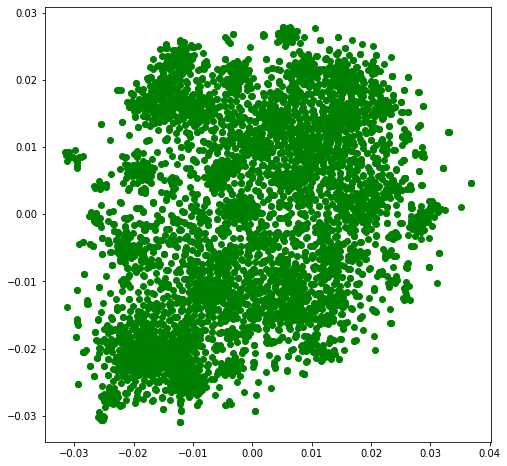

In [78]:
plt.figure(figsize=(8,8))
plt.scatter(twoDim[:,0], twoDim[:,1], color = 'green')
plt.show()